# SNS Data Segmentation

### Importing Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [85]:
df=pd.read_csv('snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Data Analysis and Preparation
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:

1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the dataset

In [87]:
df1=df.copy()
df1.shape

(30000, 40)

In [88]:
df1.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

### Checking Data Types

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [90]:
df1.dtypes.value_counts()

int64      38
object      1
float64     1
dtype: int64

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [91]:
df1.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the age ranges from 3 to 106, with mean 17

### Checking for null values and duplicates

In [92]:
df1.duplicated().sum()

650

In [93]:
df1.drop_duplicates(inplace=True)

In [95]:
df1.shape

(29350, 40)

In [96]:
df1.isnull().sum()

gradyear           0
gender          2281
age             4474
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [97]:
nv = df1.isnull().sum()
nv[nv>0]

gender    2281
age       4474
dtype: int64

In [99]:
df1['gender'].value_counts()

F    21892
M     5177
Name: gender, dtype: int64

In [101]:
df1['gender'].fillna('F',inplace=True)

In [102]:
nv = df1.isnull().sum()
nv[nv>0]

age    4474
dtype: int64

In [103]:
df1['age'].value_counts()

17.443    36
16.438    32
17.399    31
17.550    31
17.626    31
          ..
98.374     1
29.796     1
19.819     1
14.790     1
33.194     1
Name: age, Length: 2214, dtype: int64

In [108]:
df1['age'].fillna(17.443,inplace=True)

In [109]:
nv = df1.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

### Analysing data further

In [111]:
df1.iloc[:,4:].sample(20)
# Most Values are 0

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
23290,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2772,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
12479,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
26200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9563,1,1,0,0,0,1,0,0,0,0,...,0,0,2,2,0,0,0,0,0,0
6740,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
28144,0,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8973,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11328,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,0,0
1978,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
x=df1.iloc[:,3:]
print(x.columns)
print(x.dtypes.value_counts())

Index(['friends', 'basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')
int64    37
dtype: int64


In [116]:
from sklearn.cluster import KMeans

WCSS
 [40129377.197649054, 16864573.50061091, 9637823.125935744, 6496357.816170482, 4728754.655695251, 3663665.283888566, 2781057.183947876, 2238482.664762235, 1904753.092188422, 1676798.6553884207, 1529631.0182845923, 1381651.367377099, 1273783.642531634, 1166707.1273033395, 1082115.6457809762, 1009806.5488561417, 956496.0505705177, 888604.3686859377]


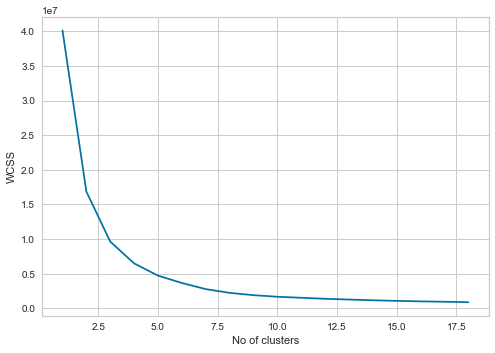

In [117]:
wcss = []
for i in range(1,19): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
from sklearn.metrics import silhouette_score

In [119]:
for i in range(2,10):
    m=KMeans(n_clusters=i).fit(x)
    print(f'Silhouette Score at K={i}',silhouette_score(x,m.labels_))

Silhouette Score at K=2 0.6479168260173964
Silhouette Score at K=3 0.5977283581403506
Silhouette Score at K=4 0.5556253148366433
Silhouette Score at K=5 0.5451557368392308
Silhouette Score at K=6 0.5286415158263411
Silhouette Score at K=7 0.5051201694542162
Silhouette Score at K=8 0.492100038808225
Silhouette Score at K=9 0.47085130930385244


- <b> Optimal value at K=2 as silhouette score highest and closest to 1 

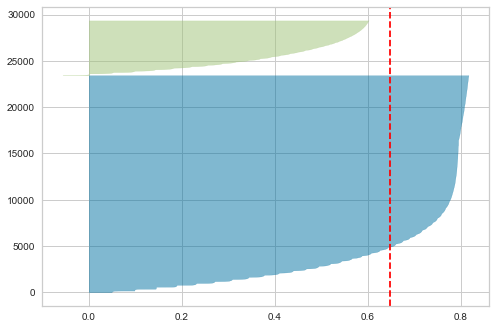

In [120]:
m2=KMeans(n_clusters=2)
visualizer=SilhouetteVisualizer(m2,colors='yellowbrick')
visualizer.fit(x)
plt.show()

In [121]:
from collections import Counter

In [122]:
ypred2=m2.predict(x)
c1=Counter(ypred2)
print(c1)

Counter({0: 23435, 1: 5915})


### Applying KMeans at K=2

In [123]:
k2= KMeans(n_clusters=2)
k2.fit(x)
ypred2=k2.predict(x)
print(ypred2)

[1 1 0 ... 1 1 1]


In [124]:
labels2= k2.labels_
print(labels2)

[1 1 0 ... 1 1 1]


In [125]:
cent2= k2.cluster_centers_
print(cent2)

[[8.68520710e+01 3.44209637e-01 2.86052409e-01 2.64919696e-01
  2.45984784e-01 1.86813187e-01 1.55367709e-01 1.53000845e-01
  1.30684700e-01 9.36601860e-02 1.49957735e-01 4.17920541e-01
  1.91208791e-01 1.68723584e-01 1.61792054e-01 1.15300085e-01
  5.14623838e-01 3.08368555e-01 4.36179205e-02 7.82924768e-01
  2.70836855e-01 5.77007608e-01 3.39983094e-01 1.50126796e-01
  2.43448859e-02 4.70667794e-01 1.36939983e-01 1.12764159e-01
  3.40659341e-01 4.55452240e-01 1.70245139e-01 1.04142012e-01
  8.28402367e-02 1.83770076e-01 1.27472527e-01 9.61961116e-02
  5.68047337e-02]
 [1.66679753e+01 2.55173885e-01 2.50693407e-01 2.18305953e-01
  1.44271389e-01 1.36078515e-01 1.32835502e-01 9.78877747e-02
  1.01344143e-01 8.80733945e-02 1.41284404e-01 3.07702155e-01
  2.19714103e-01 1.38126734e-01 1.21186260e-01 1.03008321e-01
  4.13868146e-01 3.05568594e-01 4.09643695e-02 7.45722210e-01
  2.42884574e-01 4.49754640e-01 2.31875400e-01 1.05568594e-01
  2.11649243e-02 4.22146362e-01 1.07488799e-01 9.818

In [126]:
df1['Cls2']=ypred2
df1.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cls2
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,F,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


### Clustering Result

In [127]:
res=df1.iloc[:,2:].groupby(['Cls2']).mean().T
res

Cls2,0,1
friends,86.852071,16.667975
basketball,0.344210,0.255174
football,0.286052,0.250693
soccer,0.264920,0.218306
softball,0.245985,0.144271
volleyball,0.186813,0.136079
swimming,0.155368,0.132836
cheerleading,0.153001,0.097888
baseball,0.130685,0.101344
tennis,0.093660,0.088073


### Applying KMeans at K=3

In [128]:
k3= KMeans(n_clusters=3)
k3.fit(x)
ypred3=k3.predict(x)
print(ypred3)

[1 1 0 ... 1 1 1]


In [129]:
labels3= k3.labels_
print(labels3)

[1 1 0 ... 1 1 1]


In [130]:
cent3= k3.cluster_centers_
print(cent3)

[[5.51069154e+01 3.10803262e-01 2.82761703e-01 2.58630321e-01
  2.17964473e-01 1.76293152e-01 1.57412580e-01 1.21327226e-01
  1.16523293e-01 9.49614568e-02 1.55625070e-01 3.75377053e-01
  2.11149592e-01 1.52943805e-01 1.42107027e-01 1.14512345e-01
  4.92235504e-01 3.32365099e-01 4.88213607e-02 7.81476930e-01
  2.66674115e-01 5.33906826e-01 3.03429784e-01 1.36632778e-01
  2.31259077e-02 4.52128254e-01 1.29706178e-01 1.32834320e-01
  2.98625852e-01 4.19282762e-01 1.62439951e-01 9.02692437e-02
  6.45737906e-02 1.92380740e-01 1.27136633e-01 9.00458049e-02
  5.97698581e-02]
 [1.08192720e+01 2.46922711e-01 2.43383169e-01 2.11738602e-01
  1.32653600e-01 1.28004649e-01 1.26631095e-01 9.59374505e-02
  1.00586402e-01 8.62169158e-02 1.37144065e-01 2.97110254e-01
  2.14168736e-01 1.36615775e-01 1.18284114e-01 1.00058112e-01
  3.97221195e-01 2.94574462e-01 3.78255587e-02 7.37915368e-01
  2.39896455e-01 4.34307148e-01 2.20455386e-01 1.01114692e-01
  2.06033071e-02 4.14390618e-01 1.02171272e-01 8.325

In [131]:
df1['Cls3']=ypred3
df1.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cls2,Cls3
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2006,F,18.995,10,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,1


### Clustering Result

In [132]:
res=df1.iloc[:,2:].groupby(['Cls3']).mean().T
res

Cls3,0,1,2
friends,55.106915,10.819272,140.329252
basketball,0.310803,0.246923,0.380952
football,0.282762,0.243383,0.291837
soccer,0.258630,0.211739,0.244898
softball,0.217964,0.132654,0.254422
volleyball,0.176293,0.128005,0.199320
swimming,0.157413,0.126631,0.153741
cheerleading,0.121327,0.095937,0.202041
baseball,0.116523,0.100586,0.136735
tennis,0.094961,0.086217,0.092517


### Applying KMeans at K=4

In [133]:
k4= KMeans(n_clusters=4)
k4.fit(x)
ypred4=k4.predict(x)
print(ypred4)

[0 0 1 ... 0 0 0]


In [134]:
labels4= k4.labels_
print(labels4)

[0 0 1 ... 0 0 0]


In [135]:
cent4= k4.cluster_centers_
print(cent4)

[[7.13439783e+00 2.35826492e-01 2.41321352e-01 2.02986618e-01
  1.26769668e-01 1.18688991e-01 1.22955589e-01 9.25075958e-02
  9.70327752e-02 8.51380180e-02 1.34850346e-01 2.85603465e-01
  2.17790420e-01 1.35820027e-01 1.13646648e-01 1.00006465e-01
  3.86062447e-01 2.87672118e-01 3.72357618e-02 7.18663133e-01
  2.34468938e-01 4.29180943e-01 2.14881376e-01 9.81963928e-02
  1.99107893e-02 4.14053914e-01 1.00394337e-01 8.46855000e-02
  2.31430603e-01 3.14241386e-01 1.42349215e-01 5.70819057e-02
  4.21488138e-02 1.86889909e-01 1.07311397e-01 8.79824164e-02
  6.61322645e-02]
 [8.31074695e+01 3.23932927e-01 2.80741870e-01 2.78455285e-01
  2.36534553e-01 1.82926829e-01 1.55487805e-01 1.55233740e-01
  1.33892276e-01 9.37500000e-02 1.47103659e-01 4.07266260e-01
  1.78099593e-01 1.69461382e-01 1.56250000e-01 1.08993902e-01
  5.09400407e-01 3.02845528e-01 4.16666667e-02 7.50000000e-01
  2.55589431e-01 5.66819106e-01 3.47560976e-01 1.52947154e-01
  2.82012195e-02 4.61128049e-01 1.27540650e-01 1.100

In [136]:
df1['Cls4']=ypred4
df1.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,Cls2,Cls3,Cls4
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2006,F,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


### Clustering Result

In [137]:
res=df1.iloc[:,2:].groupby(['Cls4']).mean().T
res

Cls4,0,1,2,3
friends,7.134398,83.107470,180.585246,38.212533
basketball,0.235826,0.323933,0.418033,0.304017
football,0.241321,0.280742,0.308197,0.272201
soccer,0.202987,0.278455,0.249180,0.245849
softball,0.126770,0.236535,0.244262,0.192287
volleyball,0.118689,0.182927,0.227869,0.171291
swimming,0.122956,0.155488,0.163934,0.151901
cheerleading,0.092508,0.155234,0.195082,0.111194
baseball,0.097033,0.133892,0.113115,0.112587
tennis,0.085138,0.093750,0.113115,0.092448
